<a href="https://colab.research.google.com/github/beercafeguy/PyMLLab/blob/master/DL_Day2_HOML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wide and deep network

In [2]:
import tensorflow as tf
from tensorflow import keras


import pandas as pd
import matplotlib.pyplot as plt

import numpy as np


from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
housing = fetch_california_housing()

In [4]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [8]:
X_train.shape[1:]

(8,)

In [11]:
# stack layers

In [20]:
input_layer = keras.layers.Input(shape=X_train.shape[1:])
hidden_layer_1 = keras.layers.Dense(30, activation='relu')(input_layer)
hidden_layer_2 = keras.layers.Dense(30, activation='relu')(hidden_layer_1)
concat_layer = keras.layers.Concatenate()([input_layer,hidden_layer_2])
output_layer = keras.layers.Dense(1)(concat_layer)
model = keras.Model(inputs = [input_layer], outputs = [output_layer])

In [23]:
#compile the model
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.001), loss="mean_squared_error")


In [24]:
# print the summary
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 dense_8 (Dense)             (None, 30)                   270       ['input_4[0][0]']             
                                                                                                  
 dense_9 (Dense)             (None, 30)                   930       ['dense_8[0][0]']             
                                                                                                  
 concatenate_3 (Concatenate  (None, 38)                   0         ['input_4[0][0]',             
 )                                                                   'dense_9[0][0]']       

In [27]:
# train the model

history = model.fit(X_train, y_train,epochs=30, batch_size=32,validation_data=(X_valid,y_valid))

Epoch 1/30
363/363 [==============================] - 2s 5ms/step - loss: 0.4155 - val_loss: 0.4481
Epoch 2/30
363/363 [==============================] - 2s 5ms/step - loss: 0.4134 - val_loss: 0.4463
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4114 - val_loss: 0.4440
Epoch 4/30
363/363 [==============================] - 1s 3ms/step - loss: 0.4093 - val_loss: 0.4420
Epoch 5/30
363/363 [==============================] - 1s 4ms/step - loss: 0.4071 - val_loss: 0.4420
Epoch 6/30
363/363 [==============================] - 2s 4ms/step - loss: 0.4054 - val_loss: 0.4416
Epoch 7/30
363/363 [==============================] - 1s 3ms/step - loss: 0.4035 - val_loss: 0.4386
Epoch 8/30
363/363 [==============================] - 1s 3ms/step - loss: 0.4017 - val_loss: 0.4377
Epoch 9/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3999 - val_loss: 0.4340
Epoch 10/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3983 - val_loss: 0.4333

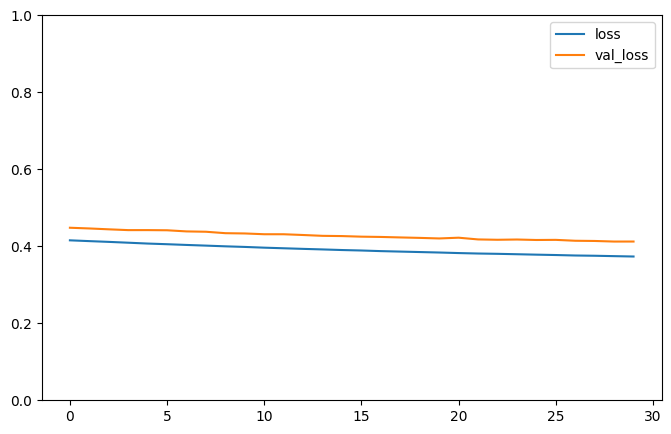

In [31]:
history_pd = pd.DataFrame(history.history)

history_pd.plot(kind='line',figsize=(8,5))
plt.grid=True
plt.gca().set_ylim(0,1)
plt.show()

What if we want to sent just a set of features in deep path and rest in wide path (direct)

In [32]:
wide_input_layer = keras.layers.Input(shape=[5], name="wide_input") # 5 features in wide path (0-4)
deep_input_layer = keras.layers.Input(shape=[6], name="deep_input") # 6 features in deep path (2-7)
hidden_layer_1 = keras.layers.Dense(30, activation='relu')(deep_input_layer)
hidden_layer_2 = keras.layers.Dense(30, activation='relu')(hidden_layer_1)
concat_layer = keras.layers.Concatenate()([wide_input_layer,hidden_layer_2])
output_layer = keras.layers.Dense(1,name="output")(concat_layer)
model = keras.Model(inputs = [wide_input_layer,deep_input_layer], outputs = [output_layer])

In [33]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 deep_input (InputLayer)     [(None, 6)]                  0         []                            
                                                                                                  
 dense_11 (Dense)            (None, 30)                   210       ['deep_input[0][0]']          
                                                                                                  
 wide_input (InputLayer)     [(None, 5)]                  0         []                            
                                                                                                  
 dense_12 (Dense)            (None, 30)                   930       ['dense_11[0][0]']            
                                                                                            

In [34]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.001), loss="mean_squared_error")

In [35]:
X_train_wide,X_train_deep = X_train[:,:5],X_train[:,2:]
X_valid_wide,X_valid_deep = X_valid[:,:5],X_valid[:,2:]
X_test_wide,X_test_deep = X_test[:,:5],X_test[:,2:]

X_new_wide,X_new_deep = X_test[:3,:5],X_test[:3,2:]

In [36]:
history = model.fit(
    (X_train_wide,X_train_deep),
    y_train,
    epochs=30,
    batch_size=32,
    validation_data=((X_valid_wide,X_valid_deep),y_valid)
)

Epoch 1/30
363/363 [==============================] - 3s 6ms/step - loss: 1.8999 - val_loss: 0.9285
Epoch 2/30
363/363 [==============================] - 2s 6ms/step - loss: 0.7789 - val_loss: 0.7446
Epoch 3/30
363/363 [==============================] - 2s 5ms/step - loss: 0.6698 - val_loss: 0.6747
Epoch 4/30
363/363 [==============================] - 1s 3ms/step - loss: 0.6162 - val_loss: 0.6285
Epoch 5/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5789 - val_loss: 0.5931
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5497 - val_loss: 0.5656
Epoch 7/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5255 - val_loss: 0.5422
Epoch 8/30
363/363 [==============================] - 1s 4ms/step - loss: 0.5061 - val_loss: 0.5243
Epoch 9/30
363/363 [==============================] - 1s 4ms/step - loss: 0.4899 - val_loss: 0.5102
Epoch 10/30
363/363 [==============================] - 1s 4ms/step - loss: 0.4775 - val_loss: 0.4975

Note: Here we passed overlapping feature in wide and deep path. Its also possible to just pass separate set of features in both NN branches

In [37]:
mse_test = model.evaluate((X_test_wide,X_test_deep),y_test)
mse_test

162/162 [==============================] - 1s 5ms/step - loss: 0.4180


0.41804710030555725

In [40]:
y_pred = model.predict((X_new_wide,X_new_deep))

1/1 [==============================] - 0s 56ms/step


In [41]:
y_pred

array([[2.5200186],
       [1.5255933],
       [0.6360183]], dtype=float32)